In [1]:
import SOLVING_QKE_FUNCTION as solve
import numpy as np
import derivatives as der

In [2]:
def make_ics_eqm(N, Emax, eta_e, eta_mu):
    eps= np.linspace(Emax/N, Emax, N)
    ym0 = np.zeros((N,4))
    
    rho_ee = 1/(np.exp(eps-eta_e)+1)
    rho_mm = 1/(np.exp(eps-eta_mu)+1)

    for i in range(len(ym0)):
        p0 = rho_ee[i] + rho_mm[i]
        pz = (rho_ee[i] - rho_mm[i]) / p0
        ym0[i,:] = [p0,0,0,pz]

    
    rhobar_ee = 1/(np.exp(eps+eta_e)+1)
    rhobar_mm = 1/(np.exp(eps+eta_mu)+1)
    
    
    ym0_bar= np.zeros((N,4))
    for i in range(len(ym0_bar)):
        p0= rhobar_ee[i] + rhobar_mm[i]
        pz = (rhobar_ee[i] - rhobar_mm[i]) / p0
        ym0_bar[i,:]= [p0,0,0,pz]
        
    return der.newarray_maker(ym0,ym0_bar)

In [3]:
eta_e = 0.1
eta_mu = -0.1

y0 = make_ics_eqm(200,10,eta_e, eta_mu)

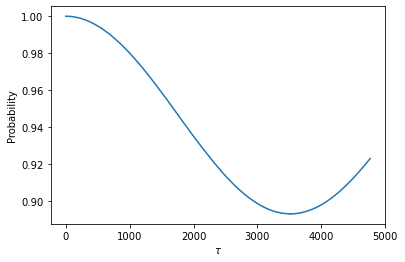

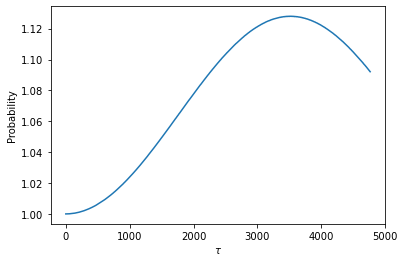

Data saved to file TTFT/T200TTFT_16h.npz
1001 time steps saved with dN = 32722
incl_thermal_term True
incl_anti_neutrinos True
incl_collisions False
incl_eta True
eta_e 0.1
eta_mu -0.1
N 200
eps_max 10
delta m-squared 2.5e-15
sin^2 (2theta) 0.8
T 1
CPU times: user 14h 26min 12s, sys: 2min 34s, total: 14h 28min 46s
Wall time: 14h 28min 21s


In [4]:
%%time
solve.solve_QKE(1, y0, True, True, "TTFT", "T200TTFT_16h", incl_collisions=False, incl_eta=True, eta_e = eta_e, eta_mu = eta_mu, use_max_run_time=True, max_hours = 16) 